<a href="https://colab.research.google.com/github/OsandaDeemantha/Fare-Classification/blob/master/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


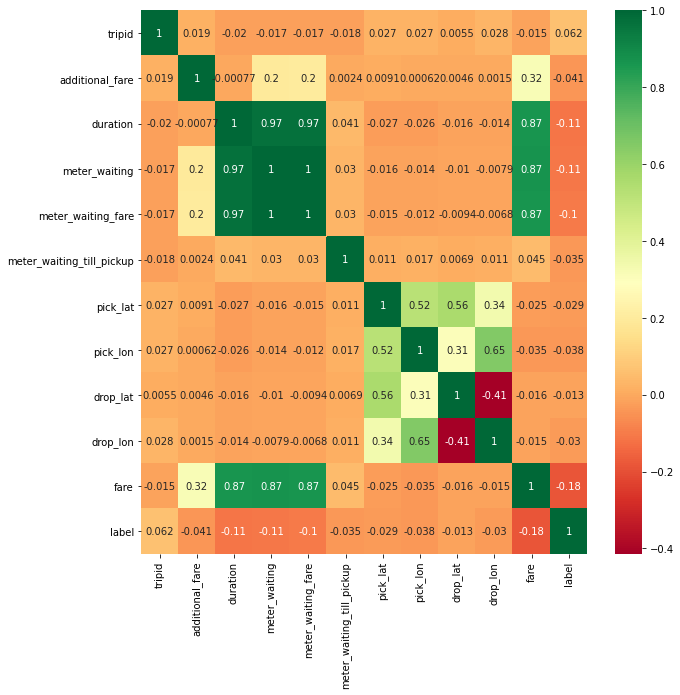

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fare-Classification/Data/train.csv')
train_df['label'].replace(to_replace=['correct','incorrect'], value=[1,0],inplace=True)
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
import datetime
from datetime import timedelta

def getGeneralDataFromDateTimeObj(time):
  datetimeFormat = '%m/%d/%Y %H:%M'
  dateTimeObj = datetime.datetime.strptime(time, datetimeFormat)
  return [dateTimeObj.month, dateTimeObj.day, dateTimeObj.hour, dateTimeObj.minute, dateTimeObj.weekday()]

In [0]:
def generate_drop_time(df):
  df_drop_time_month = []
  df_drop_time_day = []
  df_drop_time_hour = []
  df_drop_time_minute = []

  for time in df['drop_time']:
    data = getGeneralDataFromDateTimeObj(time)
    df_drop_time_month.append(data[0])
    df_drop_time_day.append(data[1])
    df_drop_time_hour.append(data[2])
    df_drop_time_minute.append(data[3])

  df['drop_time_month'] = df_drop_time_month
  df['df_drop_time_day'] = df_drop_time_day
  df['df_drop_time_hour'] = df_drop_time_hour
  df['df_drop_time_minute'] = df_drop_time_minute

In [0]:
def generate_pickup_time(df):
  df_pickup_time_month = []
  df_pickup_time_day = []
  df_pickup_time_hour = []
  df_pickup_time_minute = []

  for time in df['pickup_time']:
    data = getGeneralDataFromDateTimeObj(time)
    df_pickup_time_month.append(data[0])
    df_pickup_time_day.append(data[1])
    df_pickup_time_hour.append(data[2])
    df_pickup_time_minute.append(data[3])

  df['df_pickup_time_month'] = df_pickup_time_month
  df['df_pickup_time_day'] = df_pickup_time_day
  df['df_pickup_time_hour'] = df_pickup_time_hour
  df['df_pickup_time_minute'] = df_pickup_time_minute

In [0]:

import numpy as np
from sklearn.impute import SimpleImputer

def naImputation(Features, column_names):
  # df.replace(np.NaN,np.NaN,inplace=True)
  imp=SimpleImputer(missing_values=np.NaN)
  idf=pd.DataFrame(imp.fit_transform(Features))
  idf.columns=Features.columns
  idf.index=Features.index

  for column_name in column_names:
    idf[column_name].isna().sum()

  
  return idf

In [7]:
train_df['label'].value_counts()

1    15495
0     1681
Name: label, dtype: int64

In [8]:
train_df.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'label'],
      dtype='object')

In [9]:
train_y = train_df.label
list = ['tripid','pickup_time','drop_time','label']
train_x = train_df.drop(list,axis = 1 )
train_x.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32
1,10.5,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85
2,10.5,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64
3,10.5,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30
4,NaN,NaN,NaN,NaN,NaN,6.87441,79.8615,6.84478,79.9290,358.39


Correct:  15495
Incorrect :  1681


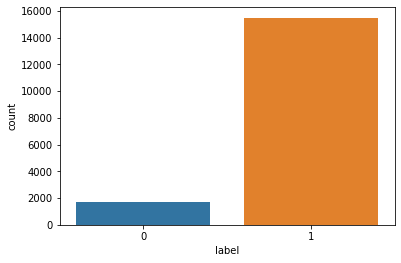

In [10]:
ax = sns.countplot(train_y,label="Count")
C, I = train_y.value_counts()
print('Correct: ',C)
print('Incorrect : ',I)

In [11]:
train_x.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

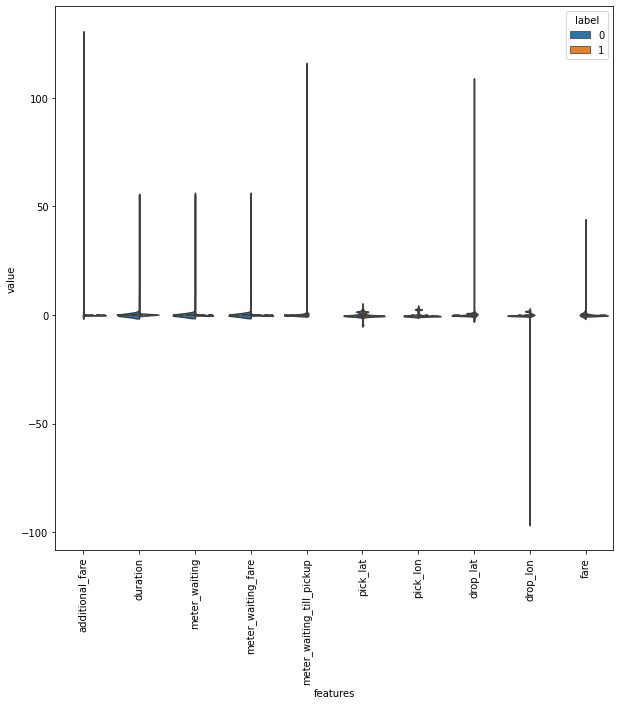

In [12]:
# first ten features
data_dia = train_y
data = train_x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([train_y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [0]:
def preprocess(df, features):
  #Features_to_calculate_distance = df[features_to_calculate_distance]
  #Features_to_calculate_distance = naImputation(Features_to_calculate_distance, features_to_calculate_distance)
  
  #distancedf = df['distance']
  #distancedf = calculateDistanceDf(df['pick_lat'], df['pick_lon'], df['drop_lat'], df['drop_lon'], distancedf)

  
  #features.append('distance')
  #print(features)
  Features = df[features]
  Features = naImputation(Features,features)
  return Features

In [0]:
def getX(Features):
    X= preprocessing.StandardScaler().fit(Features).transform(Features)
    return X

In [15]:
features = ['additional_fare','duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare']
Features = preprocess(train_df, features)
X = getX(Features)
y = train_df['label'].values
Features.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.500000,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32
1,10.500000,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85
2,10.500000,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64
3,10.500000,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30
4,13.719651,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39


In [16]:
X= preprocessing.StandardScaler().fit(Features).transform(Features)
Features.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.500000,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32
1,10.500000,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85
2,10.500000,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64
3,10.500000,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30
4,13.719651,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39


In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [0]:
trainScores={}
testScores={}

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, y_train=X,y

bestScore=0.0
accList=[]
for k in range(3,15):
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 5 | Cross validation Accuracy : 0.9257685759673686


In [0]:
clf_knn.fit(X,y)
y_pred=best_clf.predict(X)
trainScores={}

In [22]:
# trainScores['KNN-jaccard']=jaccard_similarity_score(y_test, y_pred)
trainScores['KNN-macro-f1-score']=f1_score(y, y_pred, average='macro')
trainScores

{'KNN-macro-f1-score': 0.7682675335274918}

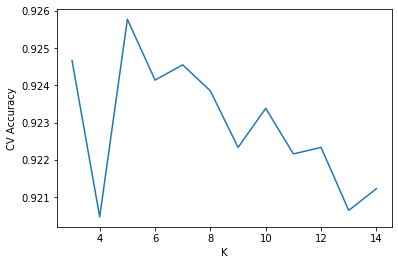

In [23]:
plt.plot(range(3,15),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [24]:
trainScores

{'KNN-macro-f1-score': 0.7682675335274918}

In [0]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fare-Classification/Data/test.csv')
features_test = ['additional_fare','duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare']
Features_for_test = df_test[features_test]

In [26]:
Features_for_test = preprocess(df_test, features_test)
X_pred = getX(Features_for_test)
Features_for_test.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,924.0,42.0,2.4486,148.0,6.83454,79.8750,6.77490,79.8840,289.27
1,10.5,4249.0,20.0,0.0000,91.0,6.91168,79.8723,6.55091,79.9706,1912.70
2,10.5,1552.0,255.0,2.6588,23.0,6.92145,79.8478,6.90539,79.8989,394.00
3,10.5,462.0,16.0,0.0000,198.0,6.77433,79.9416,6.80401,79.9407,154.32
4,10.5,814.0,392.0,12.3692,69.0,6.97968,79.9130,6.98875,79.8914,147.47


In [0]:
y_pred_for_test = clf_knn.predict(X_pred)

In [28]:
y_pred_for_test

array([1, 0, 1, ..., 0, 1, 1])

In [0]:
import csv

with open('/content/drive/My Drive/Colab Notebooks/Fare-Classification/Data/KNN.csv', mode='w') as submission_file:
    submission_writer = csv.writer(submission_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    submission_writer.writerow(['tripid','prediction'])
    for i in range(len(y_pred_for_test)):
      submission_writer.writerow([df_test['tripid'][i],y_pred_for_test[i]])